<a href="https://colab.research.google.com/github/anandyadav819/kaggle-notebooks/blob/main/News_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Dataset - https://www.kaggle.com/rmisra/news-category-dataset


Tasks for the dataset

1.) News Categorization

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount("gdrive/")
os.chdir("gdrive/My Drive/NLP/")

Mounted at gdrive/


#Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
! python -m spacy download en_core_web_md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 96.4MB 70.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051305 sha256=9d37f4685e0359ea3d781e2dbecf98245c17d5c7022fef847acda0f173d9dfb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-unobeagp/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load('en', disable=["tagger", "parser"])

#Load data

In [ ]:
data_path = "datasets/News Category/News_Category_Dataset_v2.json"

In [ ]:
with open(data_path) as f:
  all_lines = f.readlines()
  all_jsons = [json.loads(i) for i in all_lines]


In [ ]:
all_data_df = pd.DataFrame(all_jsons)

In [ ]:
all_data_df[["category", "headline", "short_description"]].head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


#EDA

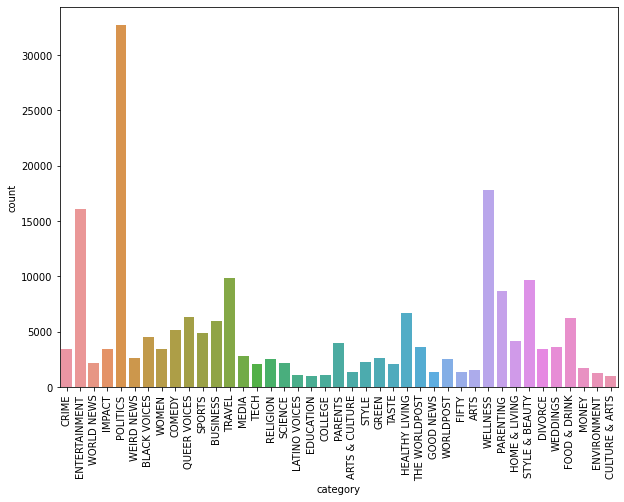

In [ ]:
# News Category distribution

plt.figure(figsize=(10, 7))
sns.countplot(x='category', data=all_data_df, color="");
plt.xticks(rotation=90)
plt.show();

In [ ]:
print(list(set(all_data_df['category'].tolist())))

['COLLEGE', 'TECH', 'TASTE', 'STYLE', 'LATINO VOICES', 'ARTS & CULTURE', 'PARENTS', 'HOME & LIVING', 'MONEY', 'GOOD NEWS', 'HEALTHY LIVING', 'TRAVEL', 'EDUCATION', 'DIVORCE', 'CULTURE & ARTS', 'BUSINESS', 'WELLNESS', 'QUEER VOICES', 'WEIRD NEWS', 'RELIGION', 'POLITICS', 'BLACK VOICES', 'WORLD NEWS', 'PARENTING', 'WOMEN', 'IMPACT', 'ENTERTAINMENT', 'SCIENCE', 'THE WORLDPOST', 'WORLDPOST', 'FOOD & DRINK', 'GREEN', 'MEDIA', 'WEDDINGS', 'ENVIRONMENT', 'CRIME', 'SPORTS', 'FIFTY', 'ARTS', 'COMEDY', 'STYLE & BEAUTY']


In [ ]:
all_data_df[all_data_df["category"]=="WOMEN"]['headline'].tolist()

['Morgan Freeman Dropped From Marketing Campaigns After Harassment Accusations',
 'The Joy Of Watching Harvey Weinstein’s Perp Walk',
 'The 20 Funniest Tweets From Women This Week',
 'Morgan Freeman Accused Of Inappropriate Behavior And Sexual Harassment',
 'What Do You Say To Sexist Passengers? This Female Pilot Has The Perfect Response.',
 "Time's Up Takes Aim At McDonald's, Walmart Over Sexual Harassment Complaints",
 "Trump Knew A 'Scary' Amount About The Appearance Of Bill Gates' Daughter",
 'The 20 Funniest Tweets From Women This Week',
 'The Miss America Pageant Is Now Headed By Women After Email Scandal',
 'Larry Nassar Victims To Receive $500 Million In Michigan State Settlement',
 "Kristen Stewart Ditches Heels On Cannes Red Carpet, Defying 'No Flats' Rule",
 'Cannes Film Festival Promises Greater Gender Equality After Times Up Activism',
 "Southern Baptist Leader Apologizes For Past 'Hurtful' Comments About Women",
 '82 Women Take To Cannes Red Carpet To Protest Inequality I

In [ ]:
#Merge Similar categories to reduce total number of categories
#Note: After exploring some of the headlines for "WOMEN" category mapping th category to "ACTIVISM"
cat_map_dict = {"CRIME":"CRIME",
                "ARTS":"ARTS",
                "CULTURE & ARTS":"ARTS",
                "ARTS & CULTURE":"ARTS",
                "LATINO VOICES":"ACTIVISM",
                "QUEER VOICES":"ACTIVISM",
                "BLACK VOICES":"ACTIVISM",
                "FOOD & DRINK":"FOOD & DRINK",
                "TASTE":"FOOD & DRINK",
                "STYLE & BEAUTY":"STYLE",
                "STYLE":"STYLE",
                "GREEN":"ENVIRONMENT",
                "ENVIRONMENT":"ENVIRONMENT",
                "COMEDY":"COMEDY",
                "CRIME":"CRIME",
                "FIFTY":"OTHER",
                "SPORTS":"SPORTS",
                "WEDDINGS":"WEDDINGS",
                "MEDIA":"MEDIA",
                "WORLDPOST":"WORLD NEWS",
                "WORLD NEWS":"WORLD NEWS",
                "THE WORLDPOST":"WORLD NEWS",
                "SCIENCE":"SCIENCE & TECH",
                "ENTERTAINMENT":"ENTERTAINMENT",
                "IMPACT":"OTHER",
                "WOMEN":"ACTIVISM",
                "PARENTS":"PARENTS",
                "PARENTING":"PARENTS",
                "POLITICS":"POLITICS",
                "RELIGION":"RELIGION",
                "WEIRD NEWS":"OTHER",
                "WELLNESS":"WELLNESS",
                "HEALTHY LIVING":"WELLNESS",
                "BUSINESS":"BUSINESS",
                "DIVORCE":"DIVORCE",
                "EDUCATION":"EDUCATION",
                "COLLEGE":"EDUCATION",
                "MONEY":"MONEY",
                "HOME & LIVING":"HOME & LIVING",
                "TECH":"SCIENCE & TECH",
                "GOOD NEWS":"OTHER",
                "TRAVEL":"TRAVEL"}
#print(len(cat_map_dict))
all_data_df['new_category'] = all_data_df['category'].map(cat_map_dict)

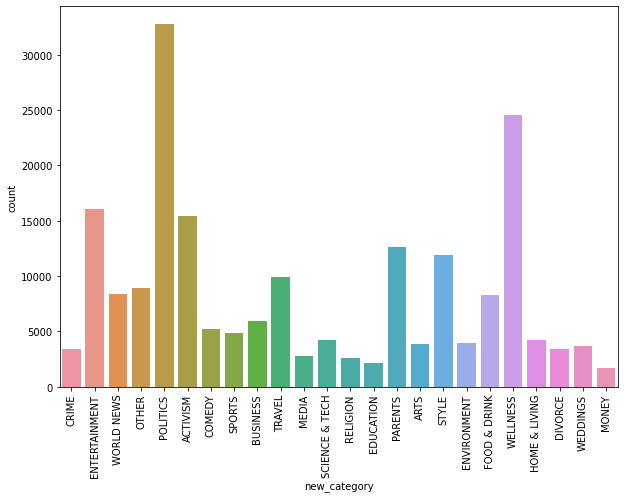

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='new_category', data=all_data_df);
plt.xticks(rotation=90)
plt.show();

#Preprocessing Headlines

In [ ]:
def clean_text(x):
  #x = re.sub(r"\W", " ", x)
  x = re.sub(r"[0-9]", " ", x)
  x = re.sub(r"\s{2,}", " ", x)
  return x

def clean_text2(x):
  x = re.sub(r"\W", " ", x)
  #x = re.sub(r"[0-9]", " ", x)
  x = re.sub(r"\s{2,}", " ", x)
  x = re.sub(r"pron", "", x)
  x = x.strip()
  return x


In [ ]:
print(clean_text("If you've ever     been to        Disneyland anywhere you..."))

If you've ever been to Disneyland anywhere you...


In [ ]:
all_stop_words = stopwords.words('english')
#all_stop_words.append("I")

In [ ]:
#print(all_stop_words)

In [ ]:
#wnl = WordNetLemmatizer()
#stm = PorterStemmer()
#sn_stm = SnowballStemmer('english')

In [ ]:
data_cp = all_data_df[["new_category", "headline", "short_description"]].copy(deep=True)

In [ ]:
docs = list(nlp.pipe(data_cp['headline'].tolist()))
docs2 = list(nlp.pipe(data_cp['short_description'].tolist()))

In [ ]:
data_cp['headline'] = [" ".join(i.lemma_ for i in j) for j in docs]
data_cp['short_description'] = [" ".join(i.lemma_ for i in j) for j in docs2]

In [ ]:
data_cp['headline'].head(5)

0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
2      Hugh Grant Marries For The First Time At Age 57
3    Jim Carrey Blasts ' Castrato ' Adam Schiff And...
4    Julianna Margulies Uses Donald Trump Poop Bags...
Name: headline, dtype: object

In [ ]:
data_cp['headline'] = data_cp['headline'].apply(lambda x: clean_text(x))
data_cp['headline'] = data_cp['headline'].apply(lambda x:" ".join([i for i in x.lower().split() if i not in all_stop_words]))
data_cp['headline'] = data_cp['headline'].apply(lambda x: clean_text2(x))

data_cp['short_description'] = data_cp['short_description'].apply(lambda x: clean_text(x))
data_cp['short_description'] = data_cp['short_description'].apply(lambda x:" ".join([i for i in x.lower().split() if i not in all_stop_words]))
data_cp['short_description'] = data_cp['short_description'].apply(lambda x: clean_text2(x))

In [ ]:
data_cp['headline'].tolist()[:50]

['mass shootings texas last week tv',
 'smith joins diplo nicky jam world cup official song',
 'hugh grant marries first time age',
 'jim carrey blasts castrato adam schiff democrats new artwork',
 'julianna margulies uses donald trump poop bags pick dog',
 'morgan freeman devastated sexual harassment claims could undermine legacy',
 'donald trump love new mcdonald jingle tonight show bit',
 'watch amazon prime s new week',
 'mike myers reveals  would like fourth austin powers film',
 'watch hulu s new week',
 'justin timberlake visits texas school shooting victims',
 'south korean president meets north korea kim jong un talk trump summit',
 'way life risk remote oyster growing region called robots',
 'trump crackdown immigrant parents puts kids already strained system',
 'trump son concerned fbi obtained wiretaps putin ally met trump jr',
 'edward snowden one trump loves vladimir putin',
 'booyah obama photographer hilariously trolls trump spy claim',
 'ireland votes repeal abortion a

In [ ]:
cat_lbl = LabelEncoder().fit_transform(data_cp['new_category'].tolist())
cat_dummy = pd.get_dummies(cat_lbl)
cat_dummy.shape

(200853, 24)

In [ ]:
cat_lbl[:5]

NameError: ignored

#Modelling

Baseline with TFIDF and Logistic Regression

In [ ]:
tfidf = TfidfVectorizer(max_df=3000, min_df=200, ngram_range=(2, 3))

In [ ]:
text_feats = tfidf.fit_transform(data_cp['headline'])
text_feats.shape

(200853, 64)

In [ ]:
all_feats = text_feats#np.concatenate([text_feats.toarray(), branch_dummy], axis=1)

In [ ]:
#all_feats.shape, text_feats.shape

In [ ]:
#target_rating = #data_cp['category'].to_numpy()

In [ ]:
trainx, testx, trainy, testy = train_test_split(all_feats, cat_lbl, test_size=0.25, random_state=45)

In [ ]:
lr = LogisticRegression()
lr.fit(trainx, trainy)

In [ ]:
lr.score(testx, testy)

0.1942287011590393

#Deep Learning with RNNs

##Sequential Model with Self-Attention

In [ ]:
#Load pretrained GloVe embeddings
dict_w2v = {}
with open('glove.6B.50d.txt', "r") as file:
    for line in file:
        tokens = line.split()
        word = tokens[0]
        vector = np.array(tokens[1:], dtype=np.float32)
        if vector.shape[0] == 50:
            dict_w2v[word] = vector
        else:
            print("There was an issue with " + word)
# let's check the vocabulary size
print("Dictionary Size: ", len(dict_w2v))

Dictionary Size:  400000


In [ ]:
#include_ratings =[1, 3]
#data_sub = data_cp[(data_cp['Rating']==1)|(data_cp['Rating']==3)].copy()
data_sub = data_cp.copy()

In [ ]:
#data_sub['Rating'] = data_sub['Rating'].apply(lambda x: x-1)
cat_lbl_enc1 = LabelEncoder()
data_sub['cat_lbl'] = cat_lbl_enc1.fit_transform(data_sub['new_category'].tolist())

In [ ]:
data_sub.head()

,new_category,headline,short_description,cat_lbl
0,CRIME,mass shootings texas last week tv,leave husband kill child another day america,4
1,ENTERTAINMENT,smith joins diplo nicky jam world cup official...,course song,7
2,ENTERTAINMENT,hugh grant marries first time age,actor longtime girlfriend anna eberstein tie k...,7
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff democra...,actor give dems ass kick fight hard enough don...,7
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,dietland actress say use bag really cathartic ...,7


In [ ]:
data_sub.shape

(200853, 4)

In [ ]:
NUM_WORDS = 20000
NUM_CLS = len(cat_lbl_enc1.classes_)
print(cat_lbl_enc1.classes_)

['ACTIVISM' 'ARTS' 'BUSINESS' 'COMEDY' 'CRIME' 'DIVORCE' 'EDUCATION'
 'ENTERTAINMENT' 'ENVIRONMENT' 'FOOD & DRINK' 'HOME & LIVING' 'MEDIA'
 'MONEY' 'OTHER' 'PARENTS' 'POLITICS' 'RELIGION' 'SCIENCE & TECH' 'SPORTS'
 'STYLE' 'TRAVEL' 'WEDDINGS' 'WELLNESS' 'WORLD NEWS']


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="UNK")

In [ ]:
all_text, all_labels = data_sub['headline'].tolist(), data_sub['cat_lbl'].tolist()

In [ ]:
tokenizer.fit_on_texts(all_text)

In [ ]:
NUM_WORDS = len(tokenizer.word_index) + 1
print(NUM_WORDS)

54451


In [ ]:
all_sequences = tokenizer.texts_to_sequences(all_text)
all_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(all_sequences, maxlen=80)

In [ ]:
embedding_dim = 50
embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

In [ ]:
unk_cnt = 0
unk_set = set()
for word in tokenizer.word_index.keys():
    embedding_vector = dict_w2v.get(word)
    if embedding_vector is not None:
        tkn_id = tokenizer.word_index[word]
        embedding_matrix[tkn_id] = embedding_vector
    else:
        unk_cnt += 1
        unk_set.add(word)
# Print how many weren't found
print("Total unknown words: ", unk_cnt)

Total unknown words:  6391


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(all_padded_sequences, np.asarray(all_labels, dtype=np.int32), test_size=0.2, random_state=42)

In [ ]:
train_x.shape, val_x.shape, val_y.shape, train_y.shape

((160682, 80), (40171, 80), (40171,), (160682,))

In [ ]:
train_x, train_y = train_x[:(train_x.shape[0]//32)*32, :], train_y[:(train_y.shape[0]//32)*32]
val_x, val_y = val_x[:(val_x.shape[0]//32)*32, :], val_y[:(val_y.shape[0]//32)*32]

In [ ]:
class MergeHiddenStates(tf.keras.layers.Layer):
  def __init__(self):
    super(MergeHiddenStates, self).__init__()
  
  def call(self, inputs):
    #print(inputs)
    states = inputs#[0]
    return tf.reduce_mean(states, axis=1)

In [ ]:
class AttentionLayer(tf.keras.layers.Layer):
  def __init__(self, enc_hidden_state_dim = None, dec_hidden_state_dim=None, attention_dim=1,attention_type="additive"):
    super(AttentionLayer, self).__init__()

    self.attention_type = attention_type
    
    if self.attention_type=="multiplicative" and enc_hidden_state_dim and dec_hidden_state_dim:
      assert enc_hidden_state_dim!=dec_hidden_state_dim
      self.W = tf.keras.layers.Dense(enc_hidden_state_dim)
    elif self.attention_type=="additive" and enc_hidden_state_dim and dec_hidden_state_dim:
      self.W1 = tf.keras.layers.Dense(dec_hidden_state_dim)
      self.W2 = tf.keras.layers.Dense(enc_hidden_state_dim)
      self.V = tf.keras.layers.Dense(1)
  
  def call(self, enc_hidden_states, dec_hidden_state):
    
    ce = enc_hidden_states
    cd = tf.expand_dims(dec_hidden_state, axis=1)
    
    if self.attention_type=="additive":
      attention_weights = self.V(tf.nn.tanh(self.W1(cd) + self.W2(ce)))
      attention_scores = tf.nn.softmax(attention_weights, axis=1)
      context_vector = attention_scores * ce
      #print(tf.shape(context_vector))
      context_vector = tf.reduce_sum(context_vector, axis=1)
      #encoder_context = tf.matmul(attention_scores, ce)
    else:
      attention_weights = tf.matmul(cd, ce, transpose_b=True)
      attention_scores = tf.nn.softmax(attention_weights, axis=1)
      context_vector = attention_scores * ce
      context_vector = tf.reduce_sum(context_vector, axis=1)
      #encoder_context = tf.matmul(attention_scores, ce)
    
    return attention_scores, context_vector
      

In [ ]:
def create_model(input_shape=(train_x.shape[1], ), vocabsize=NUM_WORDS, emb_dim=50, rnn_units=128, batch_size=32):
  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(
                                   vocabsize,
                                   emb_dim,
                                   mask_zero=False,
                                   batch_input_shape=(batch_size, input_shape[0]),
                                   weights=[embedding_matrix], trainable=False
                               ),
                               tf.keras.layers.Bidirectional(tf.keras.layers.GRU(rnn_units, dropout=0.2, return_sequences=True)),
                               MergeHiddenStates(),
                               tf.keras.layers.Dropout(0.3),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(NUM_CLS, activation='softmax')
  ])
  return model

def create_model_v2(input_shape=(train_x.shape[1], ), vocabsize=NUM_WORDS, emb_dim=100, rnn_units=128, batch_size=32):
  
  inp = tf.keras.layers.Input(shape=input_shape, batch_size=batch_size, dtype=tf.int32)
  emb_fixed = tf.keras.layers.Embedding(
                                    vocabsize,
                                    emb_dim,
                                    mask_zero=False,
                                    batch_input_shape=(batch_size, input_shape[0]),
                                    weights=[embedding_matrix], trainable=False)
  
  emb_train = tf.keras.layers.Embedding(
                                    vocabsize,
                                    emb_dim,
                                    mask_zero=False,
                                    batch_input_shape=(batch_size, input_shape[0]),
                                    weights=[embedding_matrix], trainable=True)
  
  rnn_unit = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(rnn_units, dropout=0.2, return_sequences=True))
  
  x1 = emb_fixed(inp)
  x2 = emb_train(inp)
  x = tf.keras.layers.Concatenate()([x1, x2])
  whole_sequence_output = rnn_unit(x)
  x = MergeHiddenStates()(whole_sequence_output)
  x = tf.keras.layers.Dropout(0.3)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  preds = tf.keras.layers.Dense(NUM_CLS, activation='softmax')(x)
  model = tf.keras.Model(inputs=inp, outputs=preds)
  return model

def create_model_v3(input_shape=(train_x.shape[1], ), vocabsize=NUM_WORDS, emb_dim=50, rnn_units=128, batch_size=32):
  
  inp = tf.keras.layers.Input(shape=input_shape, batch_size=batch_size, dtype=tf.int32)
  emb_fixed = tf.keras.layers.Embedding(
                                    vocabsize,
                                    emb_dim,
                                    mask_zero=False,
                                    batch_input_shape=(batch_size, input_shape[0]),
                                    weights=[embedding_matrix], trainable=True)
  
  # emb_train = tf.keras.layers.Embedding(
  #                                   vocabsize,
  #                                   emb_dim,
  #                                   mask_zero=False,
  #                                   batch_input_shape=(batch_size, input_shape[0]),
  #                                   weights=[embedding_matrix], trainable=True)
  
  rnn_unit = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(rnn_units, dropout=0.2, return_sequences=True, return_state=True))
  
  x1 = emb_fixed(inp)
  #x2 = emb_train(inp)
  x = x1 #tf.keras.layers.Concatenate()([x1, x2])
  #whole_sequence_output, final_state = rnn_unit(x)
  outs = rnn_unit(x)
  #print(outs[0], outs[1])
  #x = MergeHiddenStates()(whole_sequence_output)
  _, context_vec = AttentionLayer(128, 128)(outs[0], outs[1])
  x = tf.keras.layers.Dropout(0.3)(context_vec)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  preds = tf.keras.layers.Dense(NUM_CLS, activation='softmax')(x)
  model = tf.keras.Model(inputs=inp, outputs=preds)
  return model

In [ ]:
model = create_model_v3()
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(32, 80)]           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (32, 80, 50)         2722550     input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) [(32, 80, 256), (32, 138240      embedding_4[0][0]                
__________________________________________________________________________________________________
attention_layer_3 (AttentionLay ((32, 80, 1), (32, 2 49537       bidirectional_4[0][0]            
                                                                 bidirectional_4[0][1]      

In [ ]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_obj, optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(val_x, val_y), shuffle=True)

Epoch 1/10
5021/5021 [==============================] - 197s 39ms/step - loss: 1.7220 - accuracy: 0.5095 - val_loss: 1.2075 - val_accuracy: 0.6450
Epoch 2/10
5021/5021 [==============================] - 194s 39ms/step - loss: 1.2006 - accuracy: 0.6501 - val_loss: 1.1359 - val_accuracy: 0.6656
Epoch 3/10
5021/5021 [==============================] - 194s 39ms/step - loss: 1.0563 - accuracy: 0.6870 - val_loss: 1.1028 - val_accuracy: 0.6748
Epoch 4/10
5021/5021 [==============================] - 193s 38ms/step - loss: 0.9576 - accuracy: 0.7148 - val_loss: 1.1156 - val_accuracy: 0.6753
Epoch 5/10
5021/5021 [==============================] - 193s 38ms/step - loss: 0.8757 - accuracy: 0.7375 - val_loss: 1.1237 - val_accuracy: 0.6743
Epoch 6/10
5021/5021 [==============================] - 193s 38ms/step - loss: 0.8030 - accuracy: 0.7576 - val_loss: 1.1482 - val_accuracy: 0.6730
Epoch 7/10
5021/5021 [==============================] - 192s 38ms/step - loss: 0.7520 - accuracy: 0.7719 - val_loss: 1

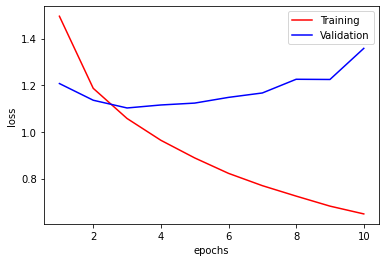

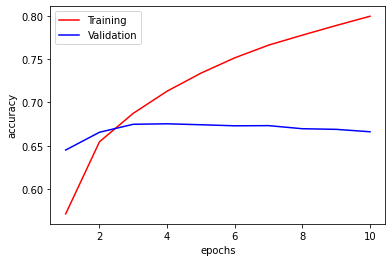

In [ ]:
train_acc, train_loss = history.history['accuracy'], history.history['loss']
val_acc, val_loss = history.history['val_accuracy'], history.history['val_loss']
plt.plot(range(1, len(train_loss)+1), train_loss, color="red")
plt.plot(range(1, len(train_loss)+1), val_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["Training", "Validation"])
plt.figure()
plt.plot(range(1, len(train_loss)+1), train_acc, color="red")
plt.plot(range(1, len(train_loss)+1), val_acc, color="blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["Training", "Validation"])
plt.show()
plt.show()

In [ ]:
val_preds = np.argmax(model.predict(val_x, batch_size=32), axis=1)

In [ ]:
val_preds.shape

(40160,)

In [ ]:
print(classification_report(val_y, val_preds, target_names=cat_lbl_enc1.classes_))

                precision    recall  f1-score   support

      ACTIVISM       0.62      0.53      0.57      3107
          ARTS       0.54      0.46      0.50       803
      BUSINESS       0.49      0.48      0.49      1121
        COMEDY       0.57      0.48      0.52      1067
         CRIME       0.47      0.66      0.55       650
       DIVORCE       0.69      0.72      0.70       696
     EDUCATION       0.48      0.49      0.48       431
 ENTERTAINMENT       0.66      0.69      0.68      3138
   ENVIRONMENT       0.51      0.50      0.50       790
  FOOD & DRINK       0.80      0.77      0.78      1723
 HOME & LIVING       0.77      0.68      0.72       848
         MEDIA       0.56      0.47      0.52       544
         MONEY       0.54      0.34      0.42       354
         OTHER       0.39      0.30      0.34      1751
       PARENTS       0.66      0.70      0.68      2536
      POLITICS       0.76      0.78      0.77      6481
      RELIGION       0.56      0.50      0.53  

In [ ]:
print(classification_report(val_y, val_preds,  target_names=cat_lbl_enc1.classes_))

                precision    recall  f1-score   support

      ACTIVISM       0.72      0.41      0.52      2423
          ARTS       0.58      0.32      0.41       813
      BUSINESS       0.54      0.37      0.44      1178
        COMEDY       0.61      0.41      0.49      1002
         CRIME       0.56      0.54      0.55       666
       DIVORCE       0.77      0.62      0.69       688
     EDUCATION       0.45      0.41      0.43       456
 ENTERTAINMENT       0.61      0.70      0.65      3254
   ENVIRONMENT       0.53      0.40      0.46       778
  FOOD & DRINK       0.72      0.80      0.76      1643
 HOME & LIVING       0.83      0.61      0.70       851
        IMPACT       0.48      0.10      0.17       650
         MEDIA       0.56      0.32      0.41       536
         MONEY       0.43      0.37      0.40       316
         OTHER       0.44      0.22      0.30      1062
       PARENTS       0.62      0.70      0.66      2584
      POLITICS       0.68      0.85      0.75  

##1D-CNN with Pretrained GloVe vectors

In [ ]:
include_ratings =[1, 3]
data_sub = data_cp.copy()
#data_sub = data_cp[(data_cp['Rating']==1)|(data_cp['Rating']==3)|(data_cp['Rating']==3)].copy()

#data_sub['Rating'] = data_sub['Rating'].apply(lambda x: x-1)
cat_lb = LabelEncoder()
data_sub['cat_lbl'] = cat_lb.fit_transform(data_sub['category'].tolist())


tokenizer = tf.keras.preprocessing.text.Tokenizer()
all_text, all_labels = data_sub['headline'].tolist(), data_sub['cat_lbl'].tolist()
tokenizer.fit_on_texts(all_text)
all_sequences = tokenizer.texts_to_sequences(all_text)
all_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(all_sequences, maxlen=100)
train_x, val_x, train_y, val_y = train_test_split(all_padded_sequences, np.asarray(all_labels, np.int32), test_size=0.2)
train_x, train_y = train_x[:(train_x.shape[0]//32)*32, :], train_y[:(train_y.shape[0]//32)*32]
val_x, val_y = val_x[:(val_x.shape[0]//32)*32, :], val_y[:(val_y.shape[0]//32)*32]

In [ ]:
list(set(data_sub['cat_lbl'].tolist()))

In [ ]:
NUM_WORDS = len(tokenizer.word_index) + 1
NUM_CLS = len(cat_lb.classes_)
print(cat_lb.classes_)

['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'WEDDINGS'
 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']


In [ ]:
data_sub.head()

,category,headline,short_description,Review_Text,cat_lbl
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,leave husband kill child another day america,There Were 2 Mass Shootings In Texas Last Week...,6
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,course song,Will Smith Joins Diplo And Nicky Jam For The 2...,10
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,actor longtime girlfriend anna eberstein tie k...,Hugh Grant Marries For The First Time At Age 57,10
3,ENTERTAINMENT,Jim Carrey Blasts ' Castrato ' Adam Schiff And...,actor give dems ass kick fight hard enough don...,Jim Carrey Blasts Castrato Adam Schiff And Dem...,10
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,dietland actress say use bag really cathartic...,Julianna Margulies Uses Donald Trump Poop Bags...,10


In [ ]:
#Load pretrained GloVe embeddings
dict_w2v = {}
with open('glove.6B.50d.txt', "r") as file:
    for line in file:
        tokens = line.split()
        word = tokens[0]
        vector = np.array(tokens[1:], dtype=np.float32)
        if vector.shape[0] == 50:
            dict_w2v[word] = vector
        else:
            print("There was an issue with " + word)
# let's check the vocabulary size
print("Dictionary Size: ", len(dict_w2v))

Dictionary Size:  400000


In [ ]:
embedding_dim = 50
embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

In [ ]:
unk_cnt = 0
unk_set = set()
for word in tokenizer.word_index.keys():
    embedding_vector = dict_w2v.get(word)
    if embedding_vector is not None:
        tkn_id = tokenizer.word_index[word]
        embedding_matrix[tkn_id] = embedding_vector
    else:
        unk_cnt += 1
        unk_set.add(word)
# Print how many weren't found
print("Total unknown words: ", unk_cnt)

Total unknown words:  6721


In [ ]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
#model.compile(loss=loss_obj, optimizer='adam', metrics=['accuracy'])

In [ ]:
def create_model(vocab_size, embedding_dim, input_shape=(100, ), batch_size=32):
  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True, batch_input_shape=(batch_size, input_shape[0]),
                                                         weights=[embedding_matrix], trainable=False),
                               tf.keras.layers.Conv1D(32, 5, 1, 'valid', activation='relu'),
                               tf.keras.layers.MaxPool1D(),
                               tf.keras.layers.Conv1D(64, 3, 1, 'valid', activation='relu'),
                               tf.keras.layers.MaxPool1D(),
                               tf.keras.layers.Conv1D(128, 3, 1, 'valid', activation='relu'),
                               tf.keras.layers.MaxPool1D(),
                               #tf.keras.layers.Conv1D(256, 3, 1, 'valid', activation='relu'),
                               #tf.keras.layers.MaxPool1D(),
                               #tf.keras.layers.Conv1D(512, 1, 1, 'valid', activation='relu'),
                               #tf.keras.layers.MaxPool1D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5, 'softmax')

  ])
  return model

In [ ]:
model = create_model(NUM_WORDS, embedding_dim, (train_x.shape[1],))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (32, 100, 50)             2787400   
_________________________________________________________________
conv1d_4 (Conv1D)            (32, 96, 32)              8032      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (32, 48, 32)              0         
_________________________________________________________________
conv1d_5 (Conv1D)            (32, 46, 64)              6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (32, 23, 64)              0         
_________________________________________________________________
conv1d_6 (Conv1D)            (32, 21, 128)             24704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (32, 10, 128)            

In [ ]:
model.compile(loss=loss_obj, optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, 32, 10, validation_data=(val_x, val_y))

Epoch 1/10
3921/5021 [======================>.......] - ETA: 3s - loss: nan - accuracy: 0.0076

KeyboardInterrupt: ignored

In [ ]:
val_preds = np.argmax(model.predict(val_x, batch_size=32), axis=1)
print(classification_report(val_y, val_preds))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39       288
           1       0.83      0.93      0.88      1024

    accuracy                           0.79      1312
   macro avg       0.69      0.62      0.63      1312
weighted avg       0.77      0.79      0.77      1312

